In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/Users/arianzarifian/Downloads/Ml-Project-2/Data_cleaning/dataset_divar_cleaned_V1.csv',index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30054 entries, 0 to 30053
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   district   30054 non-null  object
 1   area       30054 non-null  int64 
 2   year       30054 non-null  int64 
 3   rooms      30054 non-null  int64 
 4   value      30054 non-null  int64 
 5   floor      30054 non-null  int64 
 6   elevator   30054 non-null  bool  
 7   parking    30054 non-null  bool  
 8   warehouse  30054 non-null  bool  
dtypes: bool(3), int64(5), object(1)
memory usage: 1.7+ MB


In [4]:
df.district=df.district.astype('string')

In [5]:
df.describe()

,area,year,rooms,value,floor
count,30054.000000,30054.000000,30054.000000,3.005400e+04,30054.000000
mean,126.854229,1393.782458,2.285852,1.247282e+10,4.147102
std,134.797889,7.385807,0.756327,2.040657e+10,3.853180
min,2.000000,1371.000000,0.000000,5.000000e+07,1.000000
25%,80.000000,1388.000000,2.000000,4.160000e+09,2.000000
50%,110.000000,1396.000000,2.000000,7.450000e+09,3.000000
75%,146.000000,1401.000000,3.000000,1.360000e+10,5.000000
max,13100.000000,1401.000000,4.000000,9.990000e+11,30.000000


منوجه می شویم بافت شهر تهران از نوع ساختمان های کوتاه مرتبه می باشد
باتوجه به اینکه تهران عمدتا شهری با بافت فرسوده است اما این امار نشان می ده خانه های نوساز بیشتر برای فروش می باشند

# Clean

اصلاح ستون value
area


این اگهی ها مربوط به سهام می باشن و باعث اشتباه در تحلیل می شوند پس حذف می نماییم

In [6]:
df1=df.drop(df.loc[(df['year']==1401)& (df['district']==' دریاچه شهدای خلیج فارس') |(df['district']==' دهکده المپیک' )| 
(df['district']==' سرو آزاد')| (df['district']==' چیتگر')].index)


In [7]:
df1.sort_values('value',ascending=True)

,district,area,year,rooms,value,floor,elevator,parking,warehouse
8284,چیتگر,2,1398,2,50000000,1,True,True,True
24338,دریاچه شهدای خلیج فارس,15,1401,0,295000000,8,True,True,True
29377,دهکده المپیک,10,1401,1,315000000,24,True,True,True
23342,چیتگر,50,1401,1,325000000,12,True,True,True
12524,چیتگر,51,1401,1,331500000,9,True,True,True
...,...,...,...,...,...,...,...,...,...
18398,نیاوران,1600,1399,4,490000000000,13,True,True,True
27671,نیاوران,2000,1401,4,500000000000,6,True,True,True
18404,نیاوران,3000,1396,4,650000000000,11,True,True,True
24554,نیاوران,3000,1396,4,650000000000,11,True,True,True


In [8]:
df1=df.drop(df.loc[(df['year']==1401)& (df['district']==' چیتگر ')].index)


In [9]:
df1.drop(df1.loc[df.area<=20].index,inplace=True)

In [10]:
df1.drop(df1.loc[df.value==50000000].index,inplace=True)

بزرگترین متراژ

In [11]:
df1.reset_index(drop=True)

,district,area,year,rooms,value,floor,elevator,parking,warehouse
0,نیاوران,70,1401,1,11500000000,4,True,True,True
1,نیاوران,200,1401,3,34000000000,3,True,True,True
2,کوهک,138,1398,3,8419000000,10,True,True,True
3,جیحون,80,1395,2,3300000000,2,True,True,True
4,ظفر,120,1401,2,12240000000,6,True,True,True
...,...,...,...,...,...,...,...,...,...
29192,مسعودیه,68,1400,2,2350000000,4,True,True,True
29193,نارمک,135,1382,2,5390000000,1,True,True,True
29194,تهرانپارس شرقی,54,1398,1,3200000000,2,True,True,True
29195,قیطریه,105,1401,2,12600000000,3,True,True,True


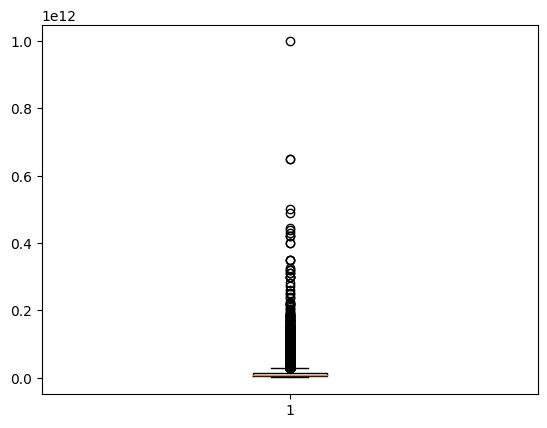

In [17]:
plt.boxplot(df1.value)
plt.show()

In [20]:
q25, q75 = df1.value.quantile( 0.25), df1.value.quantile( 0.75)
iqr = q75 - q25
cut_off=iqr *1.5
upper=q75 + cut_off

In [22]:
df1.drop(df1.loc[df.value>28387500000.0].index,inplace=True)

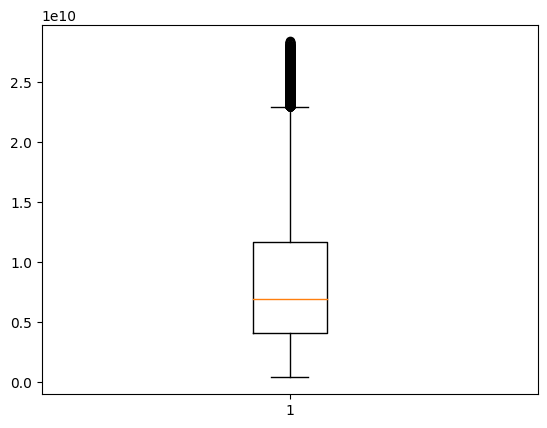

In [25]:
plt.boxplot(df1.value)
plt.show()

In [23]:
df1.describe()

,area,year,rooms,value,floor
count,26540.000000,26540.000000,26540.000000,2.654000e+04,26540.000000
mean,109.819480,1393.180219,2.185720,8.508997e+09,3.724454
std,42.849153,7.480769,0.683756,5.972999e+09,3.226739
min,30.000000,1371.000000,0.000000,3.500000e+08,1.000000
25%,77.000000,1387.000000,2.000000,4.050000e+09,2.000000
50%,105.000000,1395.000000,2.000000,6.900000e+09,3.000000
75%,135.000000,1400.000000,3.000000,1.160000e+10,4.000000
max,530.000000,1401.000000,4.000000,2.835000e+10,30.000000


# Analizing

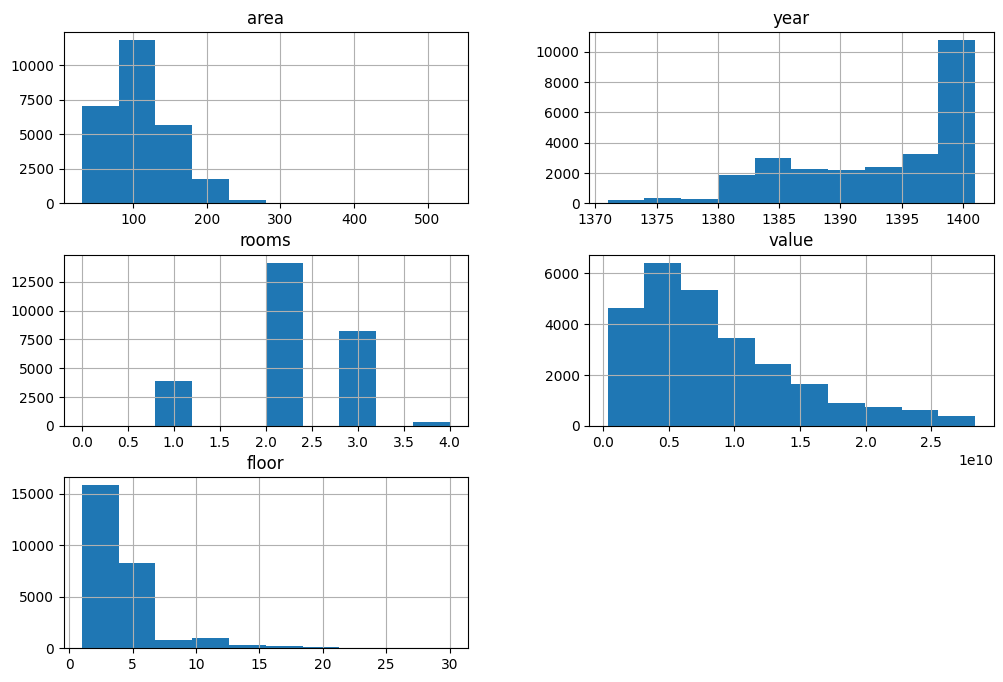

In [24]:
df1.hist(figsize=(12,8))
plt.show()

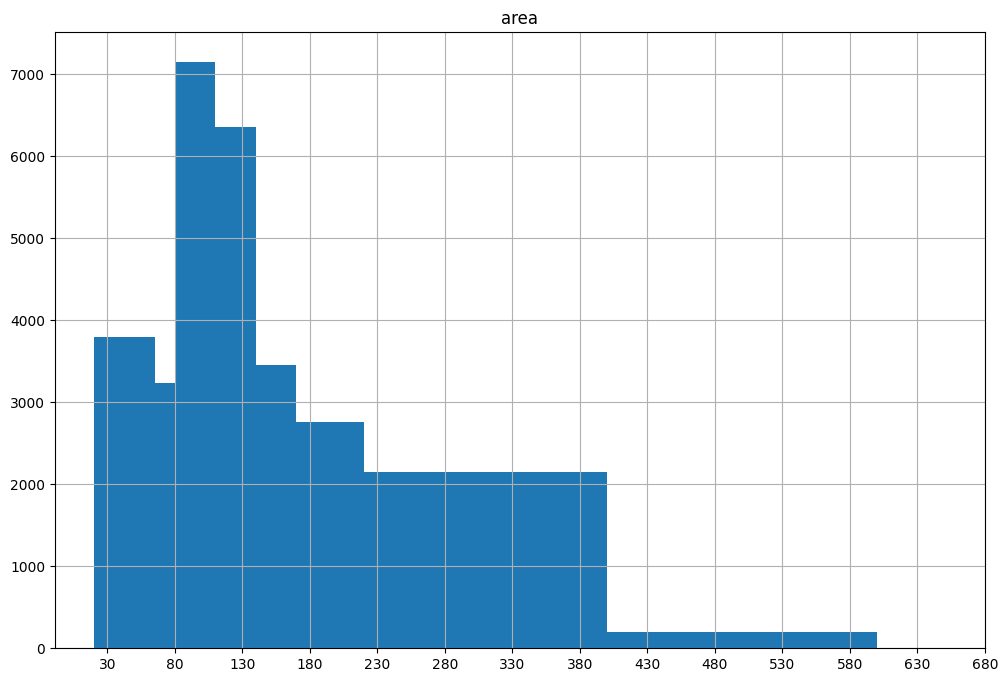

In [14]:
df1.hist('area',bins=[20,65,80,110,140,170,220,400,600],figsize=(12,8))
plt.xticks(np.arange(min(df1.area), 700, 50))
plt.show()

# Create a test set

In [37]:
df1.head()

,district,area,year,rooms,value,floor,elevator,parking,warehouse
0,نیاوران,70,1401,1,11500000000,4,True,True,True
2,کوهک,138,1398,3,8419000000,10,True,True,True
3,جیحون,80,1395,2,3300000000,2,True,True,True
4,ظفر,120,1401,2,12240000000,6,True,True,True
6,هروی,115,1380,3,7250000000,1,True,True,True


In [39]:
X=df1.loc[:,['district','area','year','rooms','floor','elevator','parking','warehouse']]
Y=df1.iloc[:,4]

In [42]:
from sklearn.model_selection import train_test_split


In [50]:
from sklearn.model_selection import StratifiedShuffleSplit 
splitter = StratifiedShuffleSplit(n_splits=4, test_size=0.25, random_state=85) 
strat_splits = [] 
for train_index, test_index in splitter.split(df1, df1["year"]):     
    train_set_n = df1.iloc[train_index]     
    test_set_n = df1.iloc[test_index]     
    strat_splits.append([train_set_n,test_set_n])



In [52]:
def hist_plot(df):
    df.hist(figsize=(12,8))
    plt.show()

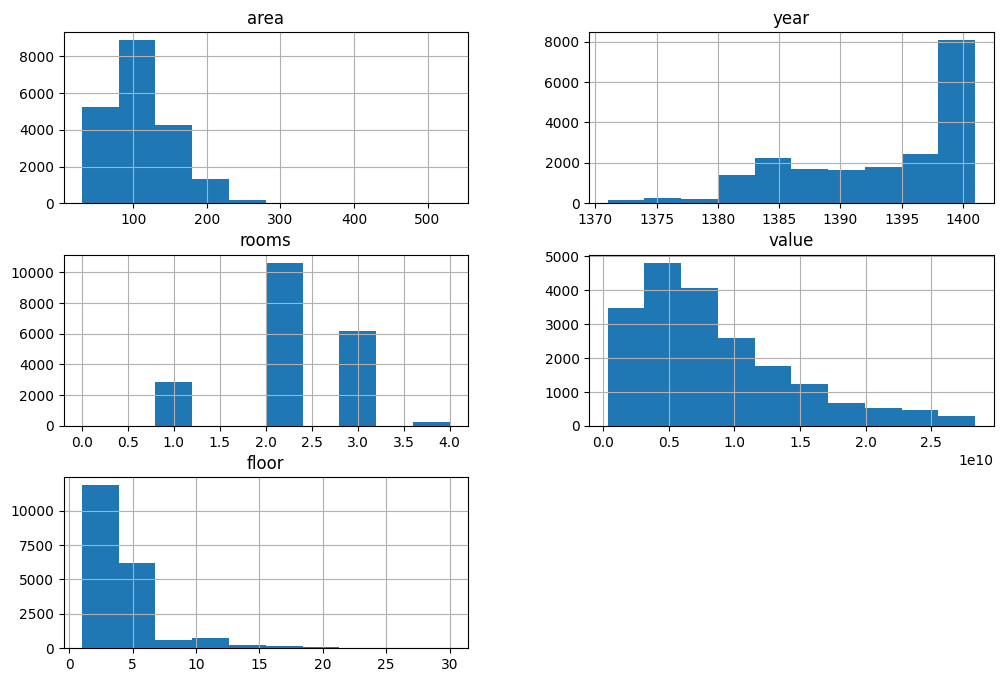

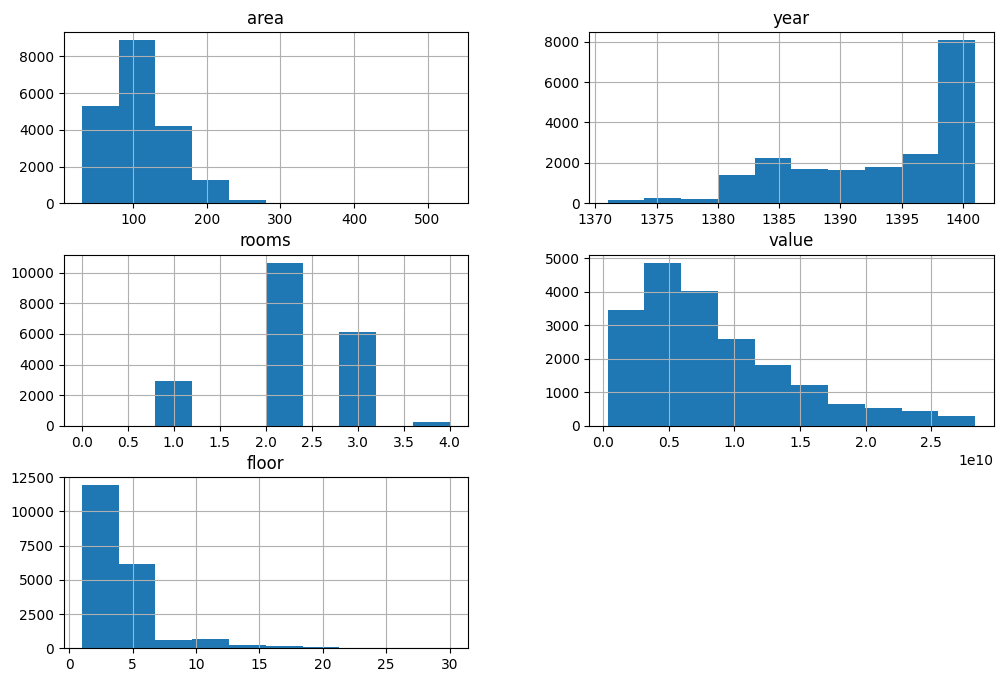

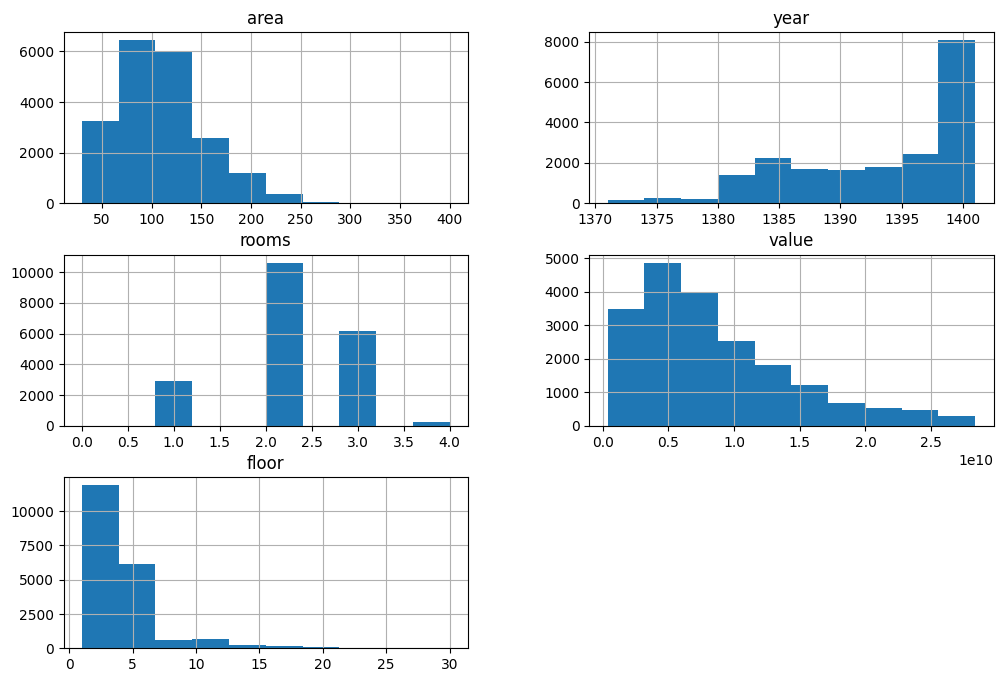

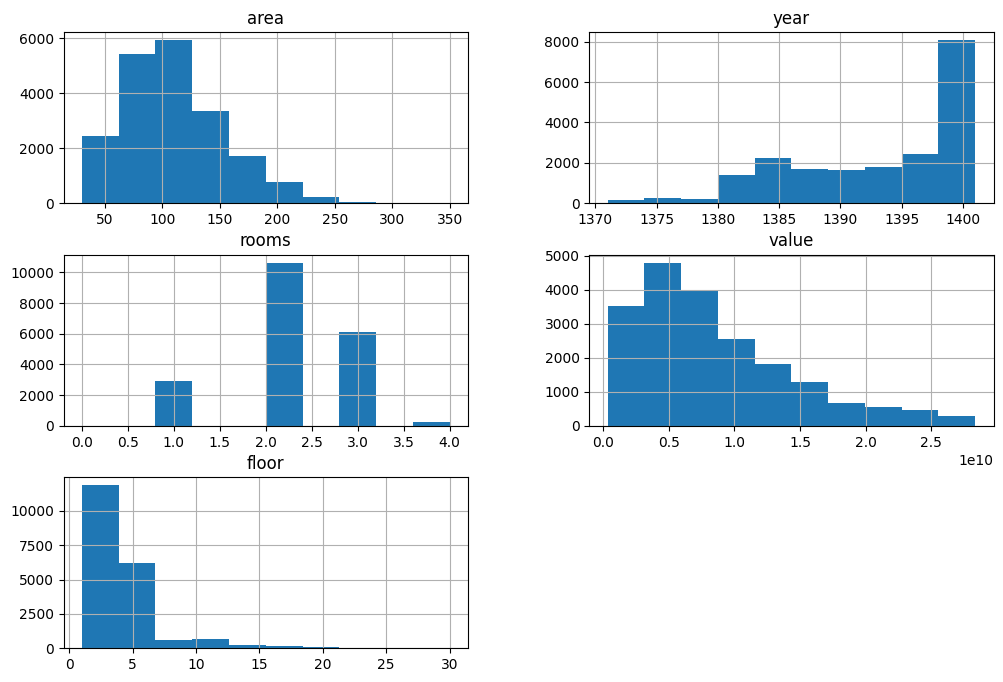

In [53]:
for df in strat_splits:
    hist_plot(df[0])

باتوجه به محدود بودن دیتا تمامی توزیع ها به توزیع اصلی نزدیک می باشند در نتیجه نمومه اول را انتخاب می نمیاییم

In [54]:
X_train=strat_splits[0][0].loc[:,['district','area','year','rooms','floor','elevator','parking','warehouse']]
Y_train=strat_splits[0][0].iloc[:,4]
X_train=strat_splits[0][1].loc[:,['district','area','year','rooms','floor','elevator','parking','warehouse']]
Y_test=strat_splits[0][1].iloc[:,4]
